<h1>Prediction using Supervised ML </h1>



### Author:Naman Bansal

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats


C:\Users\Naman\AppData\Local\r-miniconda\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Naman\AppData\Local\r-miniconda\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\Naman\AppData\Local\r-miniconda\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df= pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

<h3>Showing top entries in dataframe</h3>


In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


<h3>Analysis of Data</h3>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [7]:
def null_detection(df):
    num_cols = []
    
    count = 0
    t = []
    for i in  num_cols:
        z = np.abs(stats.zscore(df[i]))
        for j in range(len(z)):
            if z[j]>3 or z[j]<-3:
                t.append(j)
                count+=1
    df = df.drop(list(set(t)))
    df = df.reset_index()
    df = df.drop('index',axis = 1)
    print(count)
    return df

In [8]:
df = null_detection(df)

0


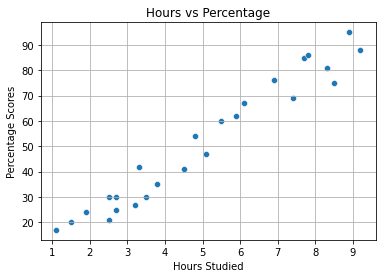

In [9]:
sns.scatterplot(x = 'Hours',y = 'Scores',data = df)
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scores')
plt.grid()
plt.show()

In [10]:
#From the above graph we observe that as the number of hours of studies increase the probability to score good marks increases..
#Thre is a a positive relation between Hours studied vs Percentage scores 

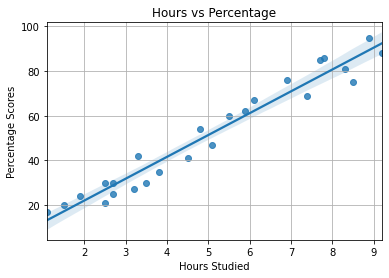

In [11]:
sns.regplot(x = 'Hours',y = 'Scores',data = df)
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scores')
plt.grid()
plt.show()

(array([3., 4., 3., 1., 3., 2., 1., 2., 3., 3.]),
 array([1.1 , 1.91, 2.72, 3.53, 4.34, 5.15, 5.96, 6.77, 7.58, 8.39, 9.2 ]),
 <BarContainer object of 10 artists>)

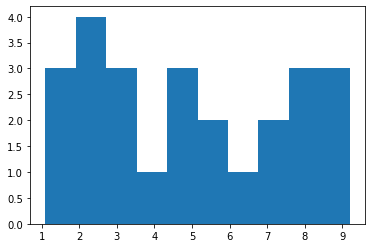

In [12]:
plt.hist(df['Hours'])

(array([4., 5., 1., 3., 1., 2., 2., 2., 3., 2.]),
 array([17. , 24.8, 32.6, 40.4, 48.2, 56. , 63.8, 71.6, 79.4, 87.2, 95. ]),
 <BarContainer object of 10 artists>)

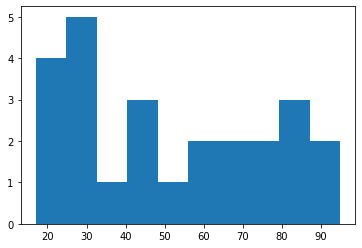

In [13]:
plt.hist(df['Scores'])

<AxesSubplot:xlabel='Hours'>

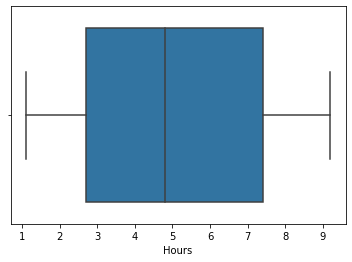

In [14]:
sns.boxplot(x='Hours',data = df)

<AxesSubplot:xlabel='Scores'>

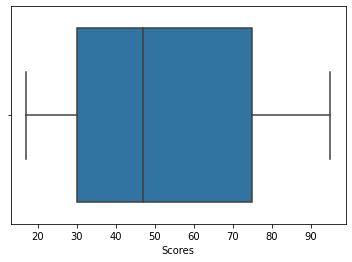

In [15]:
sns.boxplot(x='Scores',data = df)

<h2>Preparing The Data</h2>

__Divide the data into "Attributes"(input) and "labels" (output)__

In [16]:
x = df[['Hours']].values
y = df[['Scores']].values

Now we split the data into training and testing data using scikit learn 

In [17]:
#Installing the scikit learn and importinfg the required function and splitting the data
import sklearn
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
#Training the model
regression = LinearRegression()
regression.fit(x_train, y_train)

LinearRegression()

In [20]:
#Obtain the intercept and cofficient of linear model

print("The intercept is:",regression.intercept_)
print("The cofficient is :",regression.coef_[0])


The intercept is: [2.61967966]
The cofficient is : [9.62519471]


<h3>Making Prediction from the Model</h3>

In [21]:
y_prediction = regression.predict(x_test)

Now we can visualize the model prediction (best fit line) on our training and testing data

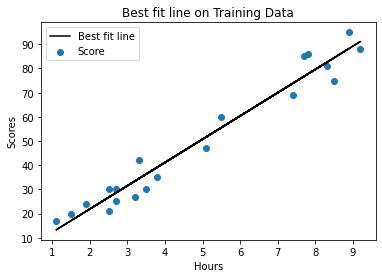

In [22]:
#visualising the predicting with respect to our data for training data

plt.scatter(x_train,y_train, label = "Score")
plt.plot(x_train, regression.predict(x_train),color = 'black', label = 'Best fit line')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Best fit line on Training Data')
plt.legend()
plt.show()

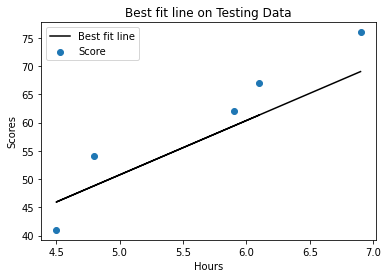

In [23]:
#for testing data

plt.scatter(x_test,y_test, label = "Score")
plt.plot(x_test, regression.predict(x_test),color = 'black', label = 'Best fit line')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Best fit line on Testing Data')
plt.legend()
plt.show()

### Making Predictions

In [24]:
print("No of Hours = ",9.25)
print("Predicted score in percentage = ",regression.predict([[9.25]])[0][0])

No of Hours =  9.25
Predicted score in percentage =  91.65273076805087


In [25]:
from sklearn import metrics
print("Mean Absolute Error : ",metrics.mean_absolute_error(y_test,y_prediction))
a = metrics.mean_squared_error(y_test,y_prediction)
print("Mean Squared Error : ",a)
print("Root Mean Squared Error: ",np.sqrt(a))

Mean Absolute Error :  5.067444500117593
Mean Squared Error :  27.704072369010873
Root Mean Squared Error:  5.263465813417132
